In [11]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import root

In [12]:
def funODE(z):
    x, y = z
    # Parameters
    q = 1/2
    b1 = 3
    c = 1
    timdir = 1
    
    # Calculate Denominator
    Denom = timdir * ((1 + q) * (x**2 - 1) - q * y**2)**2

    if abs(Denom) < 1e-6:
        return [0.0, 0.0]

    z1 = q * y**2 * (x * (x + q * x - q * y) * b1
                     - (1 + q - q * x * y + q * y**2) * c) / Denom

    z2 = q * (1 - x**2) * (((1 + q) * x * y - q * y**2) * b1
                           - (1 + q) * (1 - x**2 + x * y) * c) / Denom

    return [z1, z2]

## Plotting

In [13]:
def save_figure(filename, formats=['pdf'], **kwargs):
    """
    Save current figure in multiple formats.
    
    Parameters:
    - filename: Base filename without extension
    - formats: List of formats ['pdf', 'png', 'svg', 'jpg', etc.]
    - **kwargs: Additional kwargs for plt.savefig()
    """
    for fmt in formats:
        full_name = f"{filename}.{fmt}"
        plt.savefig(full_name, format=fmt, bbox_inches='tight', **kwargs)
        print(f"Saved: {full_name}")

Saved: figure_3c.pdf


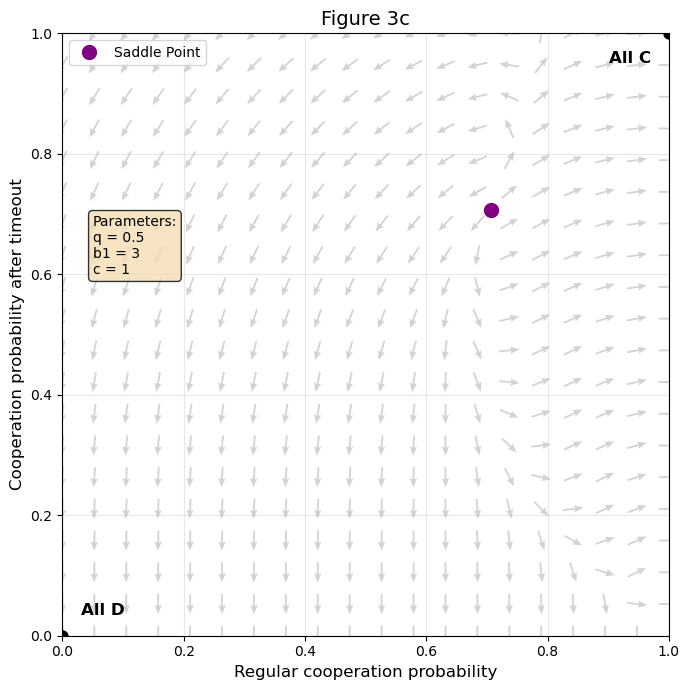

In [17]:
plt.figure(figsize=(7, 7))

# Draw Vector Field
x_range = np.linspace(0, 1, 20)
y_range = np.linspace(0, 1, 20)
X, Y = np.meshgrid(x_range, y_range)
U = np.zeros_like(X)
V = np.zeros_like(Y)

for i in range(X.shape[0]):
    for j in range(X.shape[1]):
        dx, dy = funODE([X[i, j], Y[i, j]])
        mag = np.sqrt(dx**2 + dy**2)
        if mag > 0:
            U[i, j] = dx / mag
            V[i, j] = dy / mag

plt.quiver(X, Y, U, V, color='lightgray', pivot='mid', scale=30, headwidth=4)

# Find and Plot Saddle Point
sol_root = root(funODE, [0.7, 0.7])
saddle_x, saddle_y = sol_root.x
plt.plot(saddle_x, saddle_y, 'o', color='purple', markersize=10, zorder=5, label='Saddle Point')

plt.plot(0, 0, 'ko', markersize=8)
plt.text(0.03, 0.03, "All D", fontsize=12, fontweight='bold', ha='left', va='bottom')

plt.plot(1, 1, 'ko', markersize=8)
plt.text(0.97, 0.97, "All C", fontsize=12, fontweight='bold', ha='right', va='top')

# Formatting
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('Regular cooperation probability', fontsize=12)
plt.ylabel('Cooperation probability after timeout', fontsize=12)
plt.title('Figure 3c', fontsize=14)
plt.grid(True, alpha=0.3)
plt.legend(loc='upper left')

# Parameter info
params_text = f"Parameters:\nq = {1/2}\nb1 = {3}\nc = {1}"
plt.text(0.05, 0.6, params_text, fontsize=10, 
         bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))

plt.tight_layout()

save_figure('figure_3c', formats=['pdf'], dpi=300)
plt.show()